## Customer Segmentation Using Unsupervised Machine Learning

### Christopher Taylor

https://github.com/cu-cspb-4622-fall-2024/P2-Bockslunch

### Topic

Understanding customer behavior is crucial for businesses to tailor their offerings, improve customer satisfaction, and increase revenue. This project focuses on customer segmentation using machine learning, leveraging the dataset provided in the Customer Segmentation Tutorial on Kaggle (https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python). By employing advanced clustering techniques, this project aims to group customers based on their purchasing patterns, enabling data-driven decision-making for personalized marketing and improved resource allocation.
#### Motivation
In an era where consumer preferences are increasingly diverse, businesses face challenges in delivering personalized experiences to their customers. Customer segmentation offers a solution by categorizing individuals into distinct groups based on shared characteristics and behaviors. This process allows businesses to create targeted marketing campaigns, optimize product offerings, and improve overall customer engagement.
The motivation for this project comes from the growing need to understand and predict customer needs in competitive markets. Effective customer segmentation can significantly enhance customer retention, loyalty, and profitability, while also reducing marketing and operational costs.
### Data
The dataset used for this project contains essential customer data, including demographic attributes such as age, gender, annual income, and spending score. The spending score is particularly insightful, as it reflects customer behavior in terms of purchasing habits and loyalty. With its simplicity and clarity, this dataset provides an excellent foundation for understanding segmentation techniques while offering practical applications for real-world scenarios.
#### Objectives
1. Segment Customers: Use clustering algorithms like k-means and hierarchical clustering to group customers based on their similarities.

2. Interpret Segments: Analyze the characteristics of each segment to understand customer profiles, such as high spenders, value shoppers, or occasional buyers.

3. Business Applications: Provide actionable insights for marketing strategies, such as identifying which segments to target for premium products or which segments require engagement strategies to boost spending.

#### Impact
This project is vital for businesses aiming to stay competitive in a customer-centric world. By automating the segmentation process with machine learning, companies can unlock hidden patterns in their data and make informed decisions that enhance customer satisfaction and drive growth. The insights gained from this project not only improve business efficiency but also contribute to a more personalized shopping experience for customers.
Through this endeavor, I aim to demonstrate the power of data analytics in shaping business strategies and fostering stronger customer relationships.


In [50]:
#Loading in the dataset
import pandas as pd

#loading the dataset
df = pd.read_csv("data/Mall_Customers.csv")

print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


### Exploratory Data Analysis (EDA)
#### Data Cleaning
**Handling Missing Values:**
A thorough check for missing values was conducted across all features in the dataset. Fortunately, no missing values were identified, streamlining the data preparation process. If missing values had been present, potential approaches such as imputation using mean, median, or mode (depending on the feature's nature) would have been employed to ensure the dataset's integrity.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

#checking for null values
print(df.isnull().sum())

#basic statistical analysis of features
print(df.describe())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


#### Data Visualization
**Outlier Detection:**
Box plots and statistical methods were used to identify potential outliers within numerical features like annual income and spending score. Outliers, if present, can skew the clustering results and reduce model accuracy. For example, extremely high or low values in annual income may represent atypical customers, such as outliers in a premium or low-income demographic. Based on their relevance to the analysis, decisions were made to retain, adjust, or remove these values, ensuring the data aligns with realistic patterns and business objectives. Only 2 outliers were found in the Annual Income feature, and since their income is unlikely to skew clustering models, they were left in, but marked (1) in a separate column. 

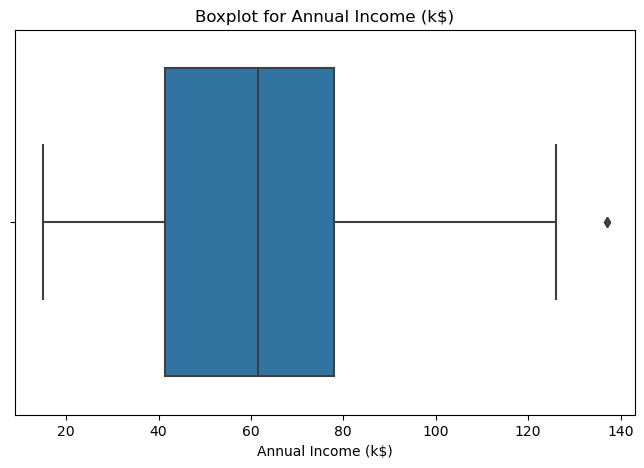

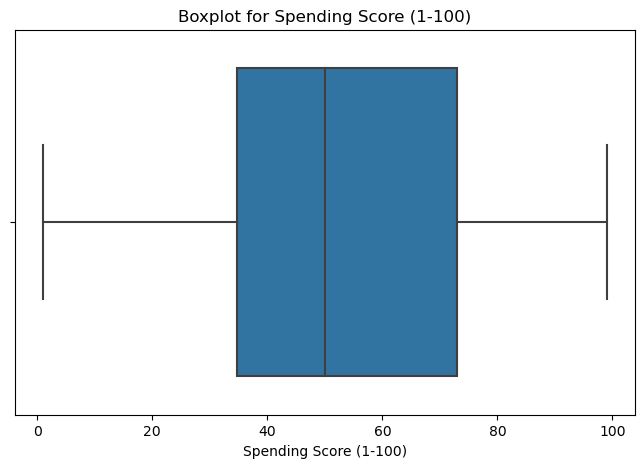

In [52]:
#boxplots for outliers in numerical features
numerical_features = ['Annual Income (k$)', 'Spending Score (1-100)']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.show()

In [53]:
#detecting outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

#detecting outliers for numerical features
for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    print(f"Outliers in {feature}:")
    print(outliers)
    print(f"Number of outliers: {len(outliers)}\n")
    
#marking outliers (1) in a new column
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[f'{feature}_Outlier'] = df[feature].apply(lambda x: 1 if x < lower_bound or x > upper_bound else 0)

print("Dataset with outlier markers:")
print(df.tail())

Outliers in Annual Income (k$):
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199   Male   32                 137                      18
199         200   Male   30                 137                      83
Number of outliers: 2

Outliers in Spending Score (1-100):
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
Number of outliers: 0

Dataset with outlier markers:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Annual Income (k$)_Outlier  Spending Score (1-100)_Outlier  
195         

**Distribution Analysis:**
The age, annual income, and spending score features were visualized using histograms to understand their distributions. These visualizations revealed insights such as whether income follows a normal distribution or spending scores cluster around certain ranges.

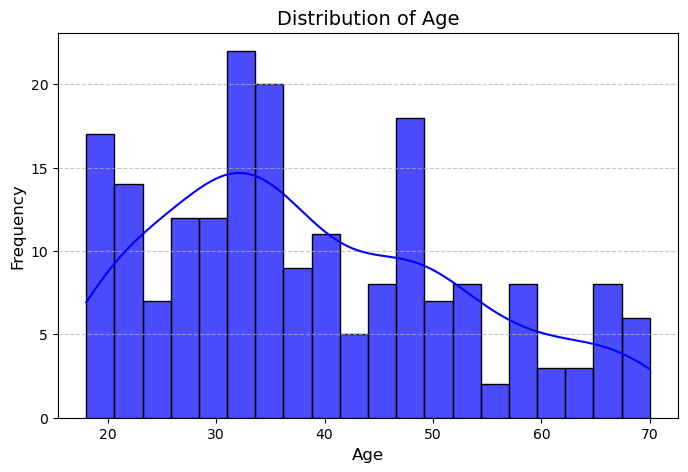

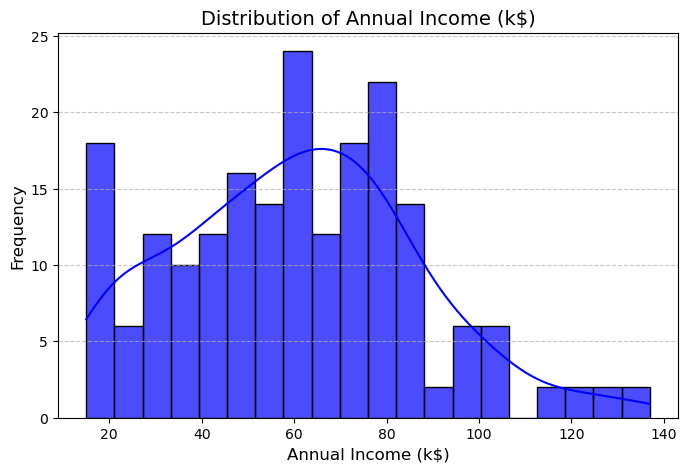

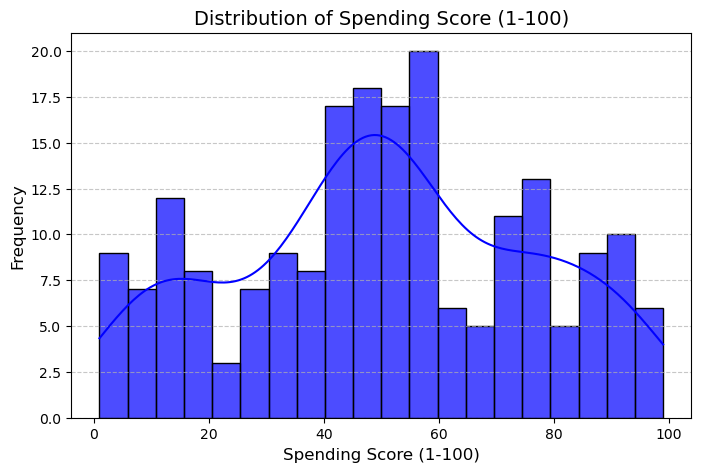

In [54]:
#features to visualize
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#creating histograms
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, kde=True, bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**Relationship Analysis:**
Pairwise scatter plots were used to explore relationships between features like annual income and spending score. This helped to identify initial groupings or trends, such as clusters of high spenders with medium incomes or low spenders with high incomes.

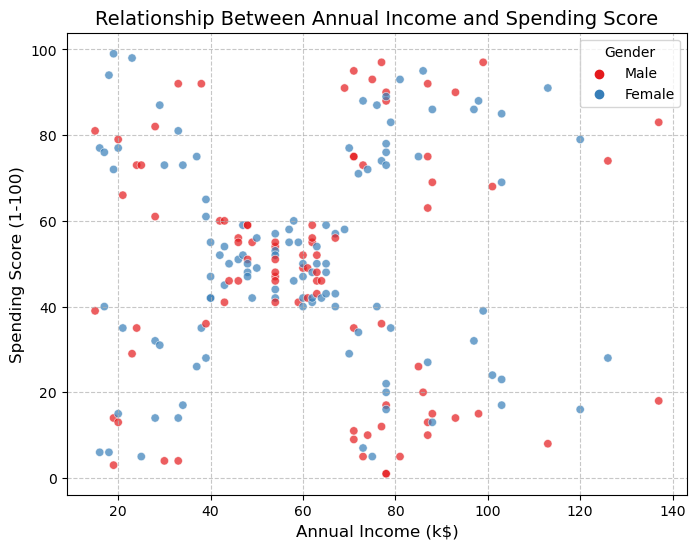

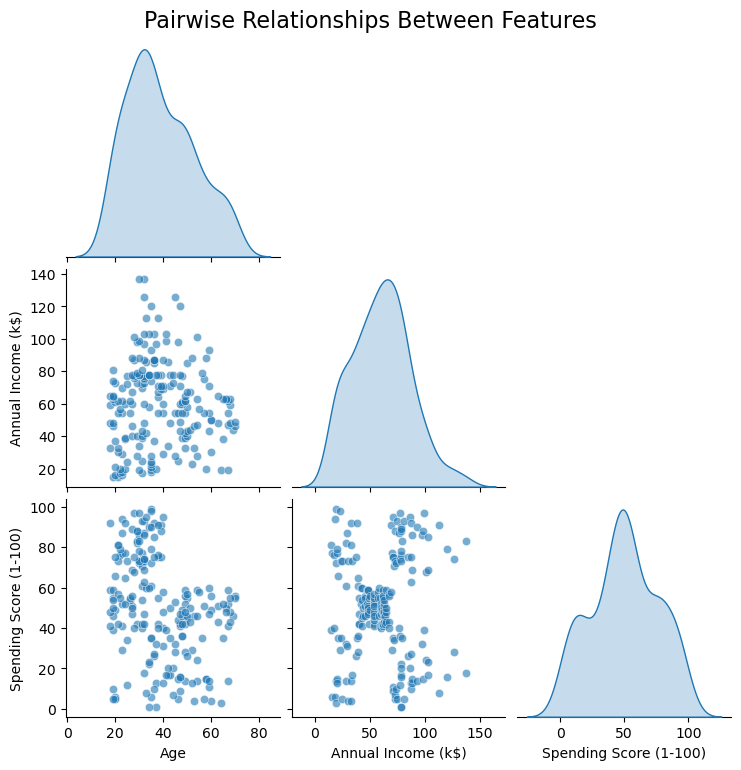

In [55]:
#scatterplot for Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', alpha=0.7, palette='Set1')
plt.title('Relationship Between Annual Income and Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Gender')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#pairplot for multiple features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
pairplot = sns.pairplot(df[features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=16)
plt.show()

**Gender Proportions:**
A pie chart was created to examine the distribution of genders in the dataset, providing insights into whether the customer base is balanced or skewed towards one gender.

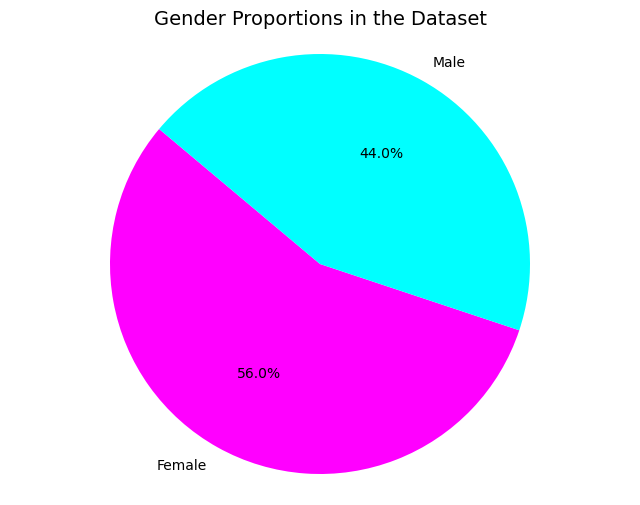

In [56]:
#counting the occurrences of each gender
gender_counts = df['Gender'].value_counts()

#pie chart for gender proportions
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['magenta', 'cyan'])
plt.title('Gender Proportions in the Dataset', fontsize=14)
plt.axis('equal')  #ensuring the pie chart is circular
plt.show()

### Summary of Insights
**Age Trends:**
The age distribution highlighted clusters of younger and middle-aged customers as the primary demographics.

**Income and Spending Behavior:**
Customers with both lower annual incomes and medium to high annual incomes tended to have more varied spending scores, indicating differences in purchasing habits among similar income groups. Customers with medium annual incomes clustered around a mid-range spending score, showing similar spending trends.

**Gender-Based Observations:**
Male and female customers showed fairly balanced representation, ensuring the analysis was inclusive of both demographics.

Through this EDA, the dataset was prepared and initial patterns were uncovered, setting a strong foundation for applying clustering techniques and deriving actionable business insights.


### Models
#### Feature Selection

In [57]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import product

#selecting relevant numerical features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
dfd = df.drop([198, 199])
X = dfd[features].values

After seeing only mediocre performance for my 3 models (Kmeans, Hierarchical, and DBSCAN) I decided to try dropping the two outliers found during EDA to see if that boosts the scoring metrics in the models.

#### K-Means Clustering

**Model Choice**

K-Means Clustering is a widely used unsupervised learning algorithm that aims to partition data into a predefined number of clusters by minimizing the variance within each cluster. It is ideal for datasets with distinct groups and works efficiently on moderately sized data. The simplicity of K-Means makes it a strong initial choice for customer segmentation, as it provides interpretable results through cluster centroids, which can represent "average" customer profiles. The algorithm's reliance on the Euclidean distance ensures that clusters are well-formed, assuming spherical distributions.

**Model Training**

To train the K-Means model, the number of clusters (k) was selected using the elbow method, where distortions (inertia) are plotted against various k values. The point of inflection in this curve suggests the optimal cluster count. After determining k=5, the model was trained using Scikit-Learn's implementation with default settings. Performance was evaluated using the silhouette score and Davies-Bouldin index to assess the separation and compactness of the clusters.


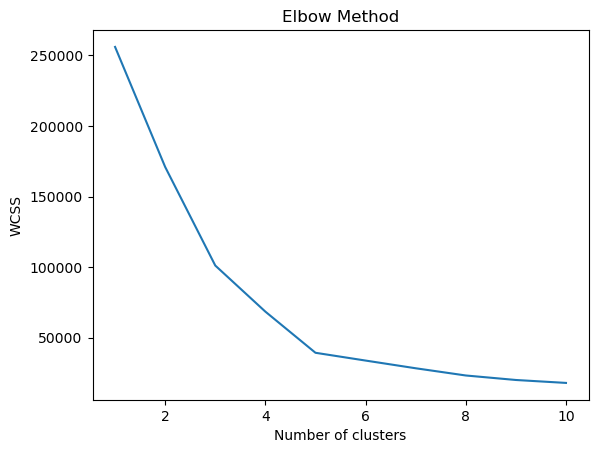

In [58]:
#finding optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Starting manual grid search...
Manual grid search completed.
Best parameters: {'n_clusters': 5, 'init': 'random', 'n_init': 10, 'max_iter': 200, 'tol': 0.0001, 'algorithm': 'lloyd'}


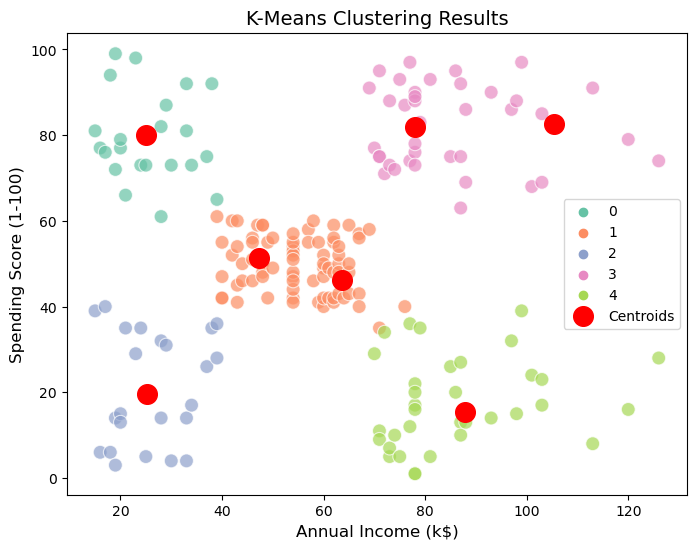

K-Means Silhouette Score: 0.5606825090788626
K-Means Davies-Bouldin Index: 0.5658771572921985


In [59]:
#defining the parameter grid
param_grid = {
    "n_clusters": [3, 4, 5, 6, 7],
    "init": ["k-means++", "random"],
    "n_init": [10, 20],
    "max_iter": [200, 300],
    "tol": [1e-4, 1e-5, 1e-6],
    "algorithm": ["lloyd", "elkan"]
}

#custom function to evaluate clustering
def evaluate_clustering(kmeans, X):
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette - davies_bouldin

#manual grid search since GridSearchCV was giving me troubles
best_score = -np.inf
best_params = {}
best_model = None

print("Starting manual grid search...")
for params in product(*param_grid.values()):
    current_params = dict(zip(param_grid.keys(), params))
    kmeans = KMeans(**current_params, random_state=42)
    score = evaluate_clustering(kmeans, X)
    
    if score > best_score:
        best_score = score
        best_params = current_params
        best_model = kmeans

print("Manual grid search completed.")
print("Best parameters:", best_params)

#using the best model for final Kmeans clustering
kmeans_labels = best_model.fit_predict(X)

#visualizing the results from Kmeans clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='Set2', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering Results', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.show()

#evaluation with silhouette and Davies Bouldin
silhouette_kmeans = silhouette_score(X, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin_kmeans}")

#### Hierarchical Clustering

**Model Choice**

Hierarchical Clustering was selected for its ability to build a hierarchy of clusters, represented as a dendrogram, without requiring a predefined number of clusters. This method is particularly useful for datasets where the number of clusters is unclear, as it provides flexibility in deciding the final cluster count based on dendrogram cuts. Its interpretability is a key advantage, as the hierarchical tree structure helps visualize relationships between data points and clusters.

**Model Training**

A similar manual grid search for the best parameters was performed for the Hierarchical clustering model (shown below), This hierarchical model was trained using Average linkage, which minimizes the variance within merged clusters, ensuring compact groups. A dendrogram was generated to visualize the hierarchy, and the number of clusters was determined by cutting the tree at a height corresponding to five clusters. The model’s performance was evaluated using silhouette score and Davies-Bouldin index to ensure well-separated and compact clusters. The dendrogram revealed meaningful hierarchical relationships, aiding in understanding customer segments' structure.


Starting manual grid search for Hierarchical Clustering...
Manual grid search completed.
Best parameters: {'linkage_method': 'average', 'n_clusters': 5}


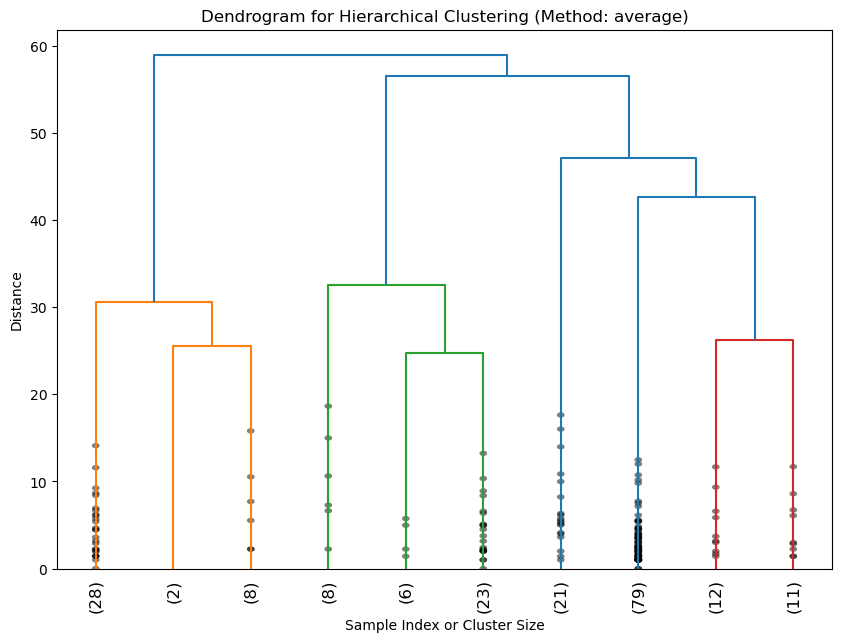

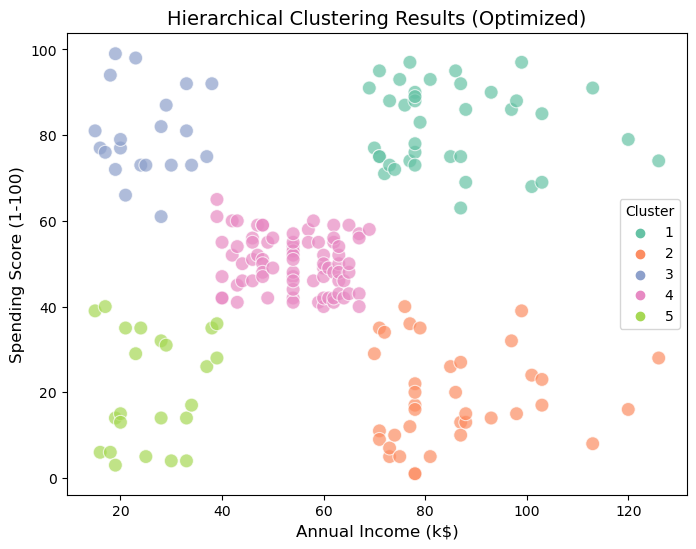

Hierarchical Clustering Silhouette Score: 0.5602703161043694
Hierarchical Clustering Davies-Bouldin Index: 0.5633651085024161


In [60]:
#defining the parameter grid
param_grid = {
    "linkage_method": ['ward', 'complete', 'average', 'single'],
    "n_clusters": [3, 4, 5, 6, 7]
}

#custom function to evaluate clustering
def evaluate_clustering(labels, X):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette - davies_bouldin

#manually grid searching
best_score = -np.inf
best_params = {}
best_labels = None

print("Starting manual grid search for Hierarchical Clustering...")
for linkage_method in param_grid['linkage_method']:
    for n_clusters in param_grid['n_clusters']:
        #performing hierarchical clustering
        linkage_matrix = linkage(X, method=linkage_method)
        labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
        
        #evaluating clustering
        score = evaluate_clustering(labels, X)
        
        if score > best_score:
            best_score = score
            best_params = {'linkage_method': linkage_method, 'n_clusters': n_clusters}
            best_labels = labels

print("Manual grid search completed.")
print("Best parameters:", best_params)

#using the best parameters for final clustering
best_linkage_matrix = linkage(X, method=best_params['linkage_method'])
hierarchical_labels = fcluster(best_linkage_matrix, t=best_params['n_clusters'], criterion='maxclust')

#visualizing the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(best_linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.title(f'Dendrogram for Hierarchical Clustering (Method: {best_params["linkage_method"]})')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

#visualizing results of hierarchical clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hierarchical_labels, palette='Set2', s=100, alpha=0.7)
plt.title('Hierarchical Clustering Results (Optimized)', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

#evaluating with Silhouette and Davies Bouldin
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)
davies_bouldin_hierarchical = davies_bouldin_score(X, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")
print(f"Hierarchical Clustering Davies-Bouldin Index: {davies_bouldin_hierarchical}")

#### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

**Model Choice**

DBSCAN was chosen for its robustness in identifying clusters of arbitrary shapes and handling noise in datasets. Unlike K-Means or Hierarchical Clustering, DBSCAN does not require specifying the number of clusters beforehand, making it ideal for exploratory analysis of customer segmentation. By focusing on the density of data points, it effectively identifies core samples, border points, and outliers, offering deeper insights into the dataset’s structure.

**Model Training**

The DBSCAN algorithm was trained by setting two key hyperparameters: epsilon (the maximum distance between two samples to be considered as part of the same neighborhood) and min_samples (the minimum number of points required to form a dense region). These parameters were tuned iteratively, with values of epsilon = 8 and min_samples = 6 yielding the most meaningful clusters. To handle noise, data points labeled as outliers (−1) were excluded from silhouette and Davies-Bouldin evaluations. Despite not forming as many clusters as K-Means or Hierarchical Clustering, DBSCAN highlighted dense customer segments and revealed noise points, representing unique customer behavior.


Starting manual grid search for DBSCAN...
Manual grid search completed.
Best parameters: {'eps': 1, 'min_samples': 3}


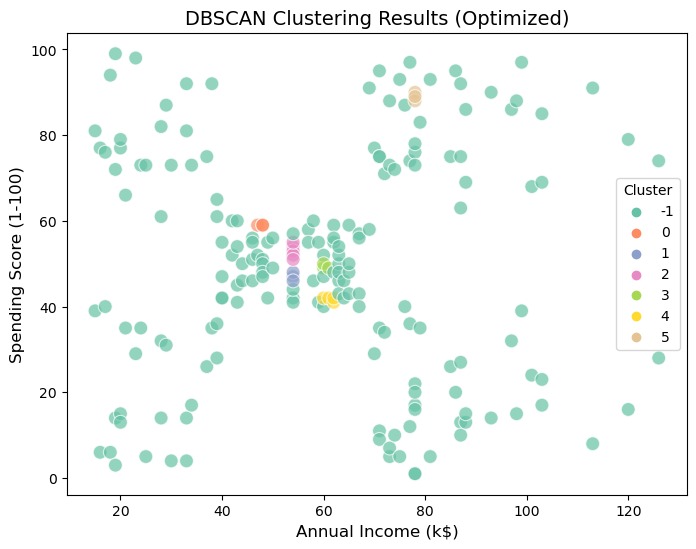

DBSCAN Silhouette Score: 0.8066734014233854
DBSCAN Davies-Bouldin Index: 0.21778511002919276
Number of clusters: 6
Number of noise points: 177


In [61]:
#defining the parameter grid
param_grid = {
    "eps": [0.5, 1, 2, 3, 4, 5, 6, 7, 8],
    "min_samples": [3, 4, 5, 6, 7, 8, 9, 10]
}

#custom function to evaluate clustering
def evaluate_clustering(labels, X):
    #filtering out noise points (label -1)
    valid_labels = labels[labels != -1]
    valid_points = X[labels != -1]
    
    if len(np.unique(valid_labels)) > 1:
        silhouette = silhouette_score(valid_points, valid_labels)
        davies_bouldin = davies_bouldin_score(valid_points, valid_labels)
        return silhouette - davies_bouldin
    else:
        return -np.inf  #returns a very low score if only one cluster or no valid clusters

#manually grid searching
best_score = -np.inf
best_params = {}
best_labels = None

print("Starting manual grid search for DBSCAN...")
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        #performing DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        #evaluating each clustering
        score = evaluate_clustering(labels, X)
        
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}
            best_labels = labels

print("Manual grid search completed.")
print("Best parameters:", best_params)

#using the best parameters for final clustering
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = best_dbscan.fit_predict(X)

#visualizing the results of DBSCAN clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='Set2', s=100, alpha=0.7)
plt.title('DBSCAN Clustering Results (Optimized)', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

#evaluating with Silhouette and Davies Bouldin
valid_labels = dbscan_labels[dbscan_labels != -1]
valid_points = X[dbscan_labels != -1]

if len(np.unique(valid_labels)) > 1:
    silhouette_dbscan = silhouette_score(valid_points, valid_labels)
    davies_bouldin_dbscan = davies_bouldin_score(valid_points, valid_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
    print(f"DBSCAN Davies-Bouldin Index: {davies_bouldin_dbscan}")
else:
    print("DBSCAN did not produce valid clusters.")

#printing the number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

The grid searching might have the best ratio of Silhouette to DBI, but when looking at the scatter plot, the clustering just doesn't look good. A human could do better clustering than this model, so another model was made where parameters were chosen manually and, although the Silhouette to DBI ratio is technically worse than the model above, the results on the scatterplot look much better, with actual clusters appearing.

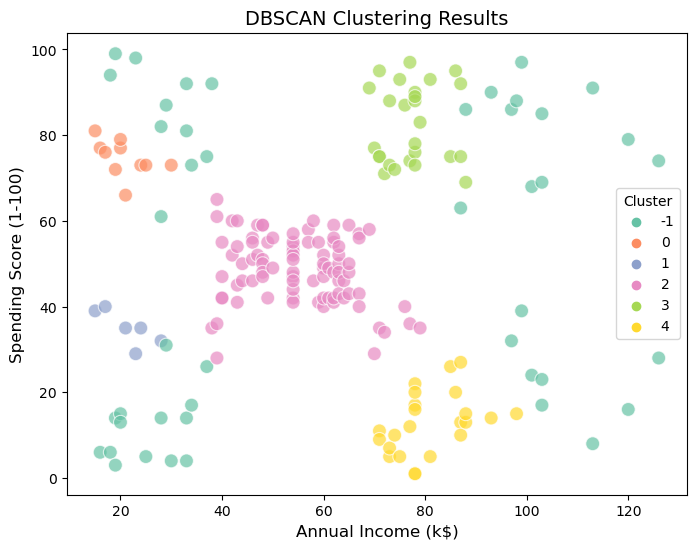

DBSCAN Silhouette Score: 0.5665956026840148
DBSCAN Davies-Bouldin Index: 0.46855528281226155


In [62]:
#DBSCAN clustering
dbscan = DBSCAN(eps=8, min_samples=6)
dbscan_labels = dbscan.fit_predict(X)

#visualizing the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='Set2', s=100, alpha=0.7)
plt.title('DBSCAN Clustering Results', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

#filtering out noise (-1 label)
valid_labels = dbscan_labels[dbscan_labels != -1]
valid_points = X[dbscan_labels != -1]

#evaluating with Silhouette and DBI
if len(np.unique(valid_labels)) > 1:  #checking if valid clusters exist
    silhouette_dbscan = silhouette_score(valid_points, valid_labels)
    davies_bouldin_dbscan = davies_bouldin_score(valid_points, valid_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
    print(f"DBSCAN Davies-Bouldin Index: {davies_bouldin_dbscan}")
else:
    print("DBSCAN did not produce valid clusters.")


### Results

Three clustering algorithms (K-Means, Hierarchical Clustering, and DBSCAN) were tested and evaluated for customer segmentation. Below is a summary of the Silhouette Score and Davies-Bouldin Index results for each method, providing insights into the performance and quality of the clusters formed.

#### Model Results

| Model | Silhouette Score | Davies-Bouldin Index |
| :- | :- | :- |
| K-Means | 0.5607 | 0.5659 |
| Hierarchical | 0.5603 | 0.5634 |
| DBSCAN | 0.5666 | 0.4686 |

#### Silhouette Score

The Silhouette score measures how similar an object is to its own cluster compared to other clusters. 

It ranges from -1 to 1, where:
1. A score close to 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters.
2. A score around 0 suggests that the object is on or very close to the decision boundary between two neighboring clusters.
3. A negative score indicates that the object might have been assigned to the wrong cluster.

The Silhouette score is calculated for each data point using the following steps:
1. Calculate the average distance between a data point and all other points in its cluster (a).
2. Calculate the average distance between the data point and all points in the nearest neighboring cluster (b).
3. The Silhouette score for the data point is (b - a) / max(a, b).
The overall Silhouette score for the clustering is the average of all data points' Silhouette scores.

#### Davies-Bouldin Index
The Davies-Bouldin index (DBI) is another metric for evaluating clustering algorithms. It measures the average similarity between each cluster and its most similar cluster. A lower DBI indicates better clustering.

DBI is calculated as follows:
$ DBI = \frac{1}{k}\sum_{i=1}^k max_{j\neq i}(\frac{S_{i} + S_{j}}{M_{i,j}})$
Where:
1. $k$ is number of clusters
2. $S_{i}$ is average distance between each point in cluster i and the cluster centroid
3. $M_{i,j}$ is the distance between the centroid of clusters i and j

Key points about the Davies-Bouldin index:

1. It considers both intra-cluster similarity (compactness) and inter-cluster differences (separation).
2. A lower DBI value indicates more compact and well-separated clusters.
3. It is an internal evaluation scheme, using only quantities inherent to the dataset.


#### Evaluation of Metrics:
**Silhouette Score:**

The Silhouette Score measures how similar data points are within the same cluster compared to points in other clusters, with higher values indicating better-defined clusters.

<u>K-Means</u>: Achieved a Silhouette Score of 0.5607, indicating well-defined clusters with relatively high intra-cluster similarity and low inter-cluster similarity.

<u>Hierarchical Clustering</u>: Performed similarly with a score of 0.5603, demonstrating that the algorithm effectively identified clusters, comparable to K-Means.

<u>DBSCAN</u>: Achieved the highest score at 0.5666, suggesting it was slightly better at identifying dense and meaningful clusters while accommodating noise.

**Davies-Bouldin Index:**

The Davies-Bouldin Index evaluates the average similarity ratio of each cluster with its most similar cluster, where lower values indicate better clustering performance.

<u>DBSCAN</u>: Outperformed both K-Means and Hierarchical Clustering with the lowest Davies-Bouldin Index of 0.4686, highlighting its strength in forming compact, well-separated clusters.

<u>Hierarchical Clustering</u>: Achieved a value of 0.5634, slightly better than K-Means, suggesting a marginally better cluster separation.

<u>K-Means</u>: Scored 0.5659, showing robust cluster formation but slightly less separation compared to DBSCAN.


#### What Could Be Improved:

**DBSCAN:** Despite careful tuning of hyperparameters (eps and min_samples), further improvement was limited, suggesting that the dataset's structure may not fully align with DBSCAN's strengths. Exploring alternative distance metrics or preprocessing steps (e.g., dimensionality reduction) could potentially enhance performance.

**K-Means and Hierarchical Clustering:** Even after using optimal cluster counts identified via the elbow method and dendrograms, the results did not significantly change. This plateau indicates that the dataset may lack distinct separations or well-defined cluster boundaries. Advanced techniques, such as Gaussian Mixture Models or spectral clustering, could be considered for better performance on such data.

**Dataset Representation:** If further improvements are needed, additional feature engineering or alternative representations like non-linear transformations or embeddings might help reveal hidden patterns, making clustering more effective.

### Conclusion:
DBSCAN emerged as the best-performing algorithm based on its Silhouette Score and Davies-Bouldin Index, effectively handling noise and forming compact clusters. K-Means and Hierarchical Clustering offered comparable results, with Hierarchical Clustering slightly outperforming K-Means in cluster separation. 

The clustering analysis provided meaningful insights into customer segmentation. Each algorithm captured unique aspects of the data, offering complementary perspectives on customer behavior. While K-Means and Hierarchical Clustering excelled in producing balanced, interpretable segments, DBSCAN proved adept at identifying nuanced structures, such as clusters of outliers or varying densities.

**Segment Customers**

The clustering results revealed distinct groups of customers based on their spending behavior and income levels. For example, clear clusters of high spenders, moderate spenders, and low spenders emerged, along with occasional buyers who displayed less predictable spending patterns. The identification of such groups lays the foundation for targeted business strategies.

**Interpret Segments**

Analyzing the clusters highlighted key customer profiles:

<u>High Spenders</u>: These customers are characterized by high annual incomes and consistent spending patterns.

<u>Value Shoppers</u>: Customers in this segment exhibit moderate spending scores relative to their income, suggesting a preference for value-oriented products or services.

<u>Occasional Buyers</u>: This group includes individuals with sporadic spending habits, which could indicate infrequent engagement or satisfaction gaps.

These profiles provide actionable insights into the preferences, needs, and behaviors of different customer groups, making them valuable for strategic decision-making.

**Business Applications**

The clustering results can drive impactful business initiatives:

<u>Marketing Campaigns</u>: High spenders could be targeted with premium products or loyalty programs to encourage continued engagement.

<u>Engagement Strategies</u>: Occasional buyers might benefit from personalized offers or incentives to boost their frequency of purchases.

<u>Product Placement</u>: Value shoppers may respond well to bundled offerings or promotional discounts tailored to their price sensitivity.

Moreover, DBSCAN's ability to identify outliers offers an opportunity to understand fringe cases, such as customers who fall outside traditional spending patterns. These insights can help businesses craft strategies to better engage and retain such individuals.

#### Final Thoughts

The combination of clustering algorithms provided a comprehensive view of the customer base, with each method offering unique strengths. While no single algorithm dominated across all metrics, the diverse perspectives highlight the importance of using multiple approaches in exploratory data analysis.

Future efforts could explore advanced techniques like Gaussian Mixture Models or spectral clustering to refine these insights. Additionally, incorporating external data sources or engineering new features could further enhance segmentation accuracy. By leveraging these insights, businesses can implement targeted, data-driven strategies that drive customer satisfaction and revenue growth.